<Axes: xlabel='Date'>

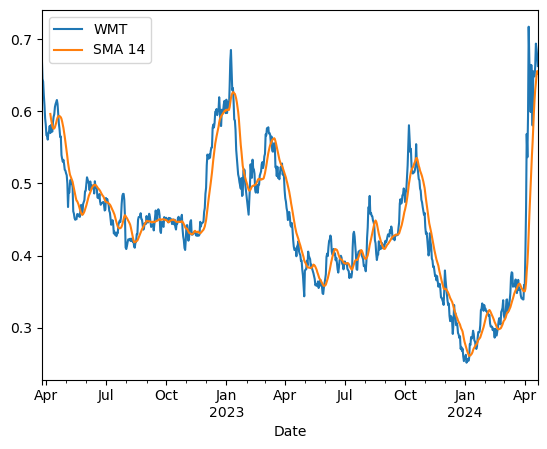

In [3]:
# Allow inline plotting
%matplotlib inline

# Import all needed libraries
import pandas as pd

# Read the data from disk
data = pd.read_csv('wmt.csv', index_col='Date', parse_dates=['Date'])
data = data.rename(columns={'C': 'WMT'})

# Calculate 14-day moving average and plot along with token data
data['SMA 14'] = data['WMT'].rolling(14).mean()
data[['WMT', 'SMA 14']].plot()

<Axes: xlabel='Date'>

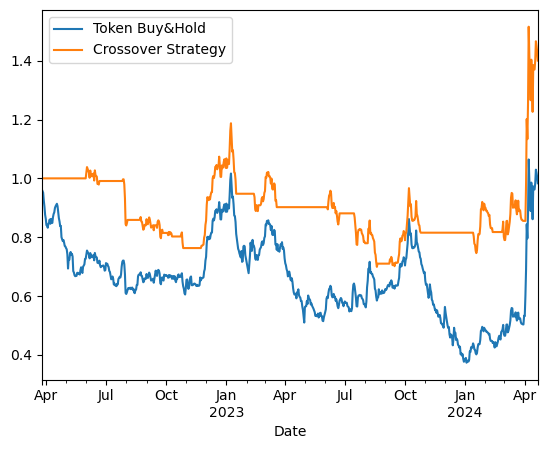

In [4]:
# Allow inline plotting
%matplotlib inline

# Import all needed libraries
import pandas as pd
import numpy as np

# Read the data from disk
data = pd.read_csv('wmt.csv', index_col='Date', parse_dates=['Date'])
data = data.rename(columns={'C': 'WMT'})

# Calculate two moving averages for crossover
data['SMA7'] = data['WMT'].rolling(7).mean()
data['SMA30'] = data['WMT'].rolling(30).mean()

# Set to 1 if 7-day is above 30-day
data['Position'] = np.where(data['SMA7'] > data['SMA30'], 1, 0)

# Buy on signal delay to next day
data['Position'] = data['Position'].shift()

# Calculate daily % return per day
data['StrategyPct'] = data['WMT'].pct_change(1) * data['Position']

# Calculate cumulative returns
data['Crossover Strategy'] = (data['StrategyPct'] + 1).cumprod()

# Calculate index cumulative returns
data['Token Buy&Hold'] = (data['WMT'].pct_change(1) + 1).cumprod()

# Plot the result
data[['Token Buy&Hold', 'Crossover Strategy']].plot()

<Axes: xlabel='Date'>

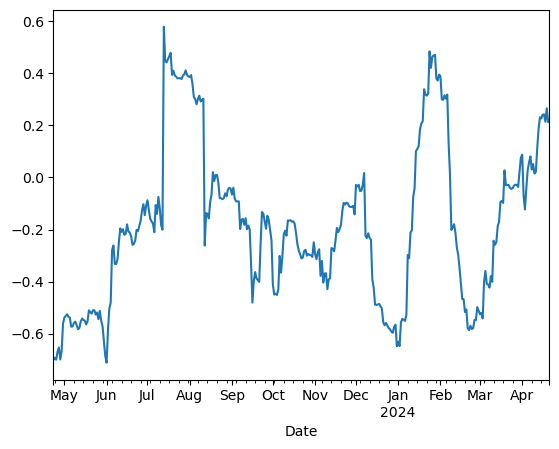

In [5]:
# Allow inline plotting
%matplotlib inline

# Import all needed libraries
import pandas as pd

# Helper function to create returns series
def get_returns(file):
    """
    This function reads a data file from disk
    and returns percentage returns.
    
    """
    return pd.read_csv(file + '.csv', index_col=0, parse_dates=True).pct_change()

# Get the WMT token data from file
df = get_returns('wmt_corr')

# Get the ADA-USD data from file
df['ADA'] = get_returns('ada_corr')

# Calculate correlations and plot the last 365 data points
df['WMT'].rolling(60).corr(df['ADA'])[-365:].plot()

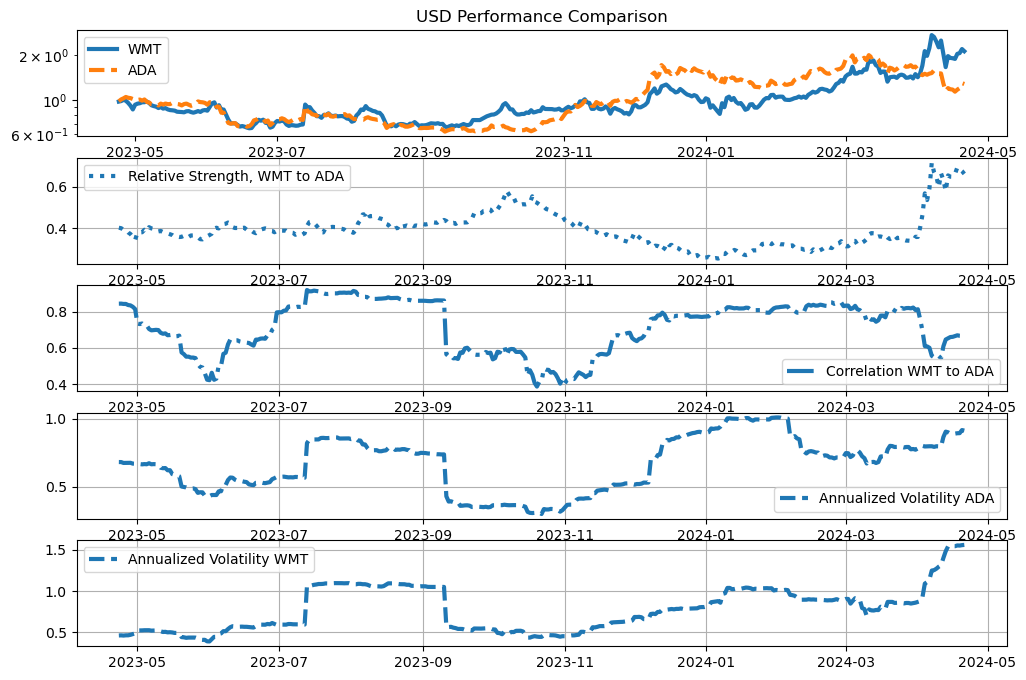

In [6]:
# Allow inline plotting
%matplotlib inline

# Import all needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Helper functions
def get_data(file):
    """
    Fetch data from disk
    """
    data = pd.read_csv(file + '.csv', index_col='Date', parse_dates=['Date'])
    return data

def calc_corr(ser1, ser2, window):
    """
    Calculates correlation between two series.
    """
    ret1 = ser1.pct_change()
    ret2 = ser2.pct_change()
    corr = ret1.rolling(window).corr(ret2)
    return corr

# Define how many points, i.e. trading days, we want to plot
points_to_plot = 365

# Get the log return data
data = get_data('fiat')

# Rebase the two series to the same point in time, start where the plot will start
for ind in data:
    data[ind + '_rebased'] = (data[-points_to_plot:][ind].pct_change() + 1).cumprod()
    
# Relative strength, WMT to ADA
data['rel_str'] = data['WMT'] / data['ADA']

# Calculate 60 day rolling correlation
data['corr'] = calc_corr(data['ADA'], data['WMT'], 60)

# Calculate the volatility metrics
data['WMT_Volatility'] = data['WMT'].pct_change().rolling(60).std() * np.sqrt(365)
data['ADA_Volatility'] = data['ADA'].pct_change().rolling(60).std() * np.sqrt(365)

# Slice the data, cut points we don't intend to plot
plot_data = data[-points_to_plot:]

# Make new figure and set the size
fig = plt.figure(figsize=(12, 8))

# The first subplot, planning for 5 plots high, 1 plot wide, this being the first
ax = fig.add_subplot(511)
ax.set_title('USD Performance Comparison')
ax.semilogy(plot_data['WMT_rebased'], linestyle='-', label='WMT', linewidth=3.0)
ax.semilogy(plot_data['ADA_rebased'], linestyle='--', label='ADA', linewidth=3.0)
ax.legend()
ax.grid(False)

# Second sub plot
ax = fig.add_subplot(512)
ax.plot(plot_data['rel_str'], label='Relative Strength, WMT to ADA', linestyle=':', linewidth=3.0)
ax.legend()
ax.grid(True)

# Third sub plot
ax = fig.add_subplot(513)
ax.plot(plot_data['corr'], label='Correlation WMT to ADA', linestyle='-.', linewidth=3.0)
ax.legend()
ax.grid(True)

# Fourth sub plot
ax = fig.add_subplot(514)
ax.plot(plot_data['ADA_Volatility'], label='Annualized Volatility ADA', linestyle='--', linewidth=3.0)
ax.legend()
ax.grid(True)

# Fifth sub plot
ax = fig.add_subplot(515)
ax.plot(plot_data['WMT_Volatility'], label='Annualized Volatility WMT', linestyle='--', linewidth=3.0)
ax.legend()
ax.grid(True)

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#prepare time series
wmt = pd.read_csv('wmt.csv', index_col='Date', parse_dates=['Date'])
prices = pd.DataFrame({'open': df["O"],
                       'close': df["C"],
                       'high': df["H"],
                       'low': df["L"]},
                       index=df["Date"])

#create figure
plt.figure()

#define width of candlestick elements
width = .4
width2 = .05

#define up and down prices
up = prices[prices.close>=prices.open]
down = prices[prices.close<prices.open]

#define colors to use
col1 = 'green'
col2 = 'red'

#plot up prices
plt.bar(up.index,up.close-up.open,width,bottom=up.open,color=col1)
plt.bar(up.index,up.high-up.close,width2,bottom=up.close,color=col1)
plt.bar(up.index,up.low-up.open,width2,bottom=up.open,color=col1)

#plot down prices
plt.bar(down.index,down.close-down.open,width,bottom=down.open,color=col2)
plt.bar(down.index,down.high-down.open,width2,bottom=down.open,color=col2)
plt.bar(down.index,down.low-down.close,width2,bottom=down.close,color=col2)

#rotate x-axis tick labels
plt.xticks(rotation=45, ha='right')

#display candlestick chart
plt.show()